In [6]:
from evaluation_utils import create_encoder_latex_table, unpivot_baseline_model, unpivot_ssl_model, read_multiple_global_results, ssl_method_to_category
from constants import MODE_1_PROCESSED_DIR, MODE_2_3_PROCESSED_DIR, TEST_METRIC, ENCODERS, TRAINING_SCHEMES, SSL_MODELS, BASELINES, AUXILIARY_ALL,\
    CONTRAST_ALL, HYBRID_ALL, GENERATION_ALL, BASELINES, model_abbreviations, FONT,\
    GENERATION_BASED_CATEGORY, HYBRID_CATEGORY, CONTRAST_BASED, AUXILIARY_CATEGORY, ENCODER_COLORS, SSL_CATEGORIES, TRAINING_SCHEMES, model_abbreviations_inv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import networkx as nx

plt.rcParams["font.family"] = FONT

In [7]:
# Mode 1 and 2/3 raw
graph_partitioning_easy_dir = '/home/daen/Thesis/graphworld/results/clusters_graph_partitioning_easy/processed'
graph_partitioning_25 = '/home/daen/Thesis/graphworld/results/graph_partitioning_p_q_25/processed'
graph_partitioning_5 = '/home/daen/Thesis/graphworld/results/graph_partitioning_p_q_5/processed'
nc_dir = '/home/daen/Thesis/graphworld/results/graph_partitioning_p_q_5/processed'
data = read_multiple_global_results(experiments=[
    ('GP_easy', '/home/daen/Thesis/graphworld/results/clusters_graph_partitioning_easy/processed'),
    ('GP_25_example', '/home/daen/Thesis/graphworld/results/graph_partitioning_p_q_25_example_graph/processed'),
    ('GP_5_example', '/home/daen/Thesis/graphworld/results/graph_partitioning_p_q_5_example_graph/processed'),
    ('NC_hard', '/home/daen/Thesis/graphworld/results/clusters_nodeclustering_with_alignment_hard/processed'),
    ('NC_easy', '/home/daen/Thesis/graphworld/results/clusters_nodeclustering_with_alignment_easy/processed'),
    ('GP_15', '/home/daen/Thesis/graphworld/results/graph_partitioning_p_q_15/processed'),
    ('GP_2', '/home/daen/Thesis/graphworld/results/graph_partitioning_p_q_2/processed'),
    ('DGI_easy', '/home/daen/Thesis/graphworld/results/dgi_easy/processed'),
    ('DGI_hard', '/home/daen/Thesis/graphworld/results/dgi_hard/processed'),
])

1.ndjson
concatenating
1.ndjson
concatenating
1.ndjson
concatenating
1.ndjson
concatenating
1.ndjson
concatenating
1.ndjson
concatenating
1.ndjson
concatenating
1.ndjson
concatenating
1.ndjson
concatenating


In [9]:
data.pretext_log = data.pretext_log.apply(lambda pretext_log: {**pretext_log, 'node_id': [*range(0, len(pretext_log['x']))] })

TypeError: 'float' object is not a mapping

# Visualize example graph

In [10]:
def get_graph(pretext_log, use_largest_component = True):
    graph_data = { 'edge_index': pretext_log['edge_index'], 'x': pretext_log['x'], 'y': pretext_log['y'], 'node_id': pretext_log['node_id'] }
    cmap = plt.get_cmap('tab20c')
    colors = [cmap(0), cmap(4), cmap(8), cmap(12), cmap(16)]

    # create a new empty Graph
    G = nx.Graph()
    for node in graph_data['node_id']:
        G.add_node(node)
    for (x, y) in zip(*graph_data['edge_index']):
        G.add_edge(x, y)

    for i, (x, y) in enumerate(zip(graph_data['x'], graph_data['y'])):
        G.nodes[i]['x'] = x
        G.nodes[i]['y'] = y
        G.nodes[i]['color'] = colors[y]

    G = G.to_undirected()
    # G.remove_nodes_from(list(nx.isolates(G)))
    if not use_largest_component:
        return G


    G = nx.algorithms.k_core(G, 2)
    Gc = max(nx.algorithms.connected_components(G), key=len)
    G.remove_nodes_from([n for n in G if n not in Gc])
    return G

def visualize_graph(G, ax_info = None):
    if ax_info == None:
        fig, ax = plt.subplots(figsize=(20,15))
    else:
        fig, ax = ax_info
    colormap = []
    colormap = [G.nodes[i]['color'] for i in G.nodes]
    nx.draw_networkx(G, pos=nx.spring_layout(G), node_color=colormap, with_labels=False, node_size=100, width=0.3, ax=ax)
    return fig, ax

In [11]:
G2 = get_graph(pretext_logs.iloc[0], use_largest_component=False)
nx.number_connected_components(G2)

NameError: name 'pretext_logs' is not defined

In [12]:
pretext_logs = data.loc[data.Experiment == 'GP_5_example', 'pretext_log']
G = get_graph(pretext_logs.iloc[0])
visualize_graph(G)

KeyError: 'node_id'

# NodeClusteringWithAlignment

In [ ]:
sample = data.loc[data.Experiment == 'NC_hard'].iloc[0]
pretext_logs = sample.loc['pretext_log']

In [ ]:
centroids_labeled = np.array(pretext_logs['NodeClusteringWithAlignment_centroids_labeled'])
centroids_unlabeled = np.array(pretext_logs['NodeClusteringWithAlignment_centroids_unlabeled_all'])
kmeans_centroids = np.array(pretext_logs['NodeClusteringWithAlignment_kmeans_cluster_centers'])
roc_auc = sample['GIN_NodeClusteringWithAlignment_URL_test_rocauc_ovr']
embeddings = sample['GIN_NodeClusteringWithAlignment_URL_embeddings']

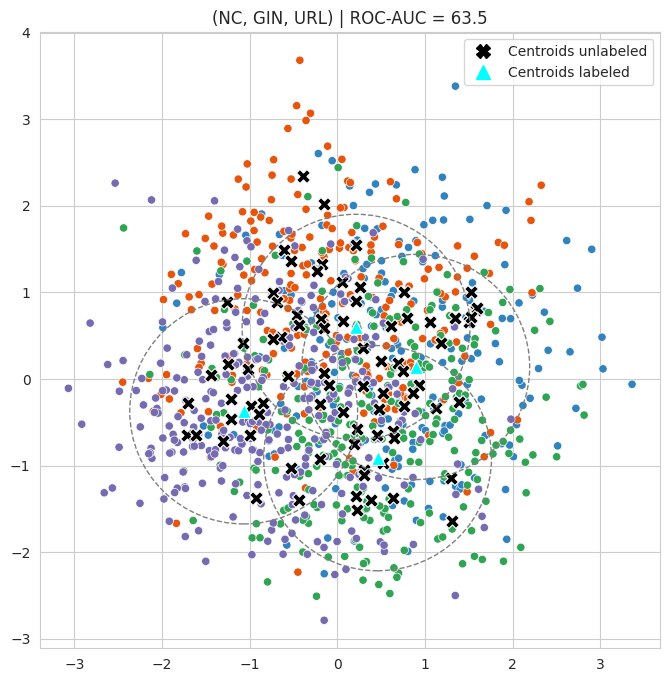

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Circle
import matplotlib.lines as mlines

fig, ax = plt.subplots(figsize=(8, 8))

x, y = np.array(pretext_logs['x']), np.array(pretext_logs['y'])
sns.set_style('whitegrid')

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
centroids_unlabeled_scaled = scaler.transform(centroids_unlabeled) # standardize the cluster centers
centroids_labeled_scaled = scaler.transform(centroids_labeled) # standardize the cluster centers

pca = PCA(n_components=2).fit(x_scaled)
pca_res = pca.transform(x_scaled)
centroids_unlabeled_pca = pca.transform(centroids_unlabeled_scaled)
centroids_labeled_pca = pca.transform(centroids_labeled_scaled)

PC1, PC2 = pca_res[:, 0], pca_res[:, 1]
C1, C2 = centroids_unlabeled_pca[:, 0], centroids_unlabeled_pca[:, 1]
CC1, CC2 = centroids_labeled_pca[:, 0], centroids_labeled_pca[:, 1]
df = pd.DataFrame({ 'PC1': PC1, 'PC2': PC2, 'y': y })
d2 = pd.DataFrame({ 'C1': C1, 'C2': C2 })
d3 = pd.DataFrame({ 'CC1': CC1, 'CC2': CC2 })
sns.scatterplot(data=df, x='PC1', y='PC2', hue='y', zorder=1, palette=color_palette, legend=False, ax=ax)
sns.scatterplot(data=d2, x='C1', y='C2', marker='X', s=100, ax=ax, color='black', legend=True)
sns.scatterplot(data=d3, x='CC1', y='CC2', marker='^', s=100, ax=ax, color='cyan', legend=True).set(title=f'(NC, GIN, URL) | ROC-AUC = {roc_auc:.1f}', xlabel='', ylabel='')
# Create legend entries
black_patch = mlines.Line2D([], [], color='black', marker='X', linestyle='None', markersize=10, label='Centroids unlabeled')
yellow_patch = mlines.Line2D([], [], color='cyan', marker='^', linestyle='None', markersize=10, label='Centroids labeled')

# Add legend to the plot
ax.legend(handles=[black_patch, yellow_patch])

for i in range(len(centroids_labeled_pca)):
    circle = Circle((CC1[i], CC2[i]), radius=1.3, edgecolor='gray', fill=False, linestyle='--')
    ax.add_patch(circle)

# Graph Partitioning

In [ ]:
sample_easy = data.loc[data.Experiment == 'GP_15']
sample_hard = data.loc[data.Experiment == 'GP_2']
# pretext_logs = data.loc[data.Experiment == 'GP_5', 'pretext_log']
sample_easy['GIN_GraphPartitioning_URL_test_rocauc_ovr']

18    96.453496
19    95.181116
Name: GIN_GraphPartitioning_URL_test_rocauc_ovr, dtype: float64

(<Figure size 2000x1500 with 1 Axes>, <AxesSubplot: >)

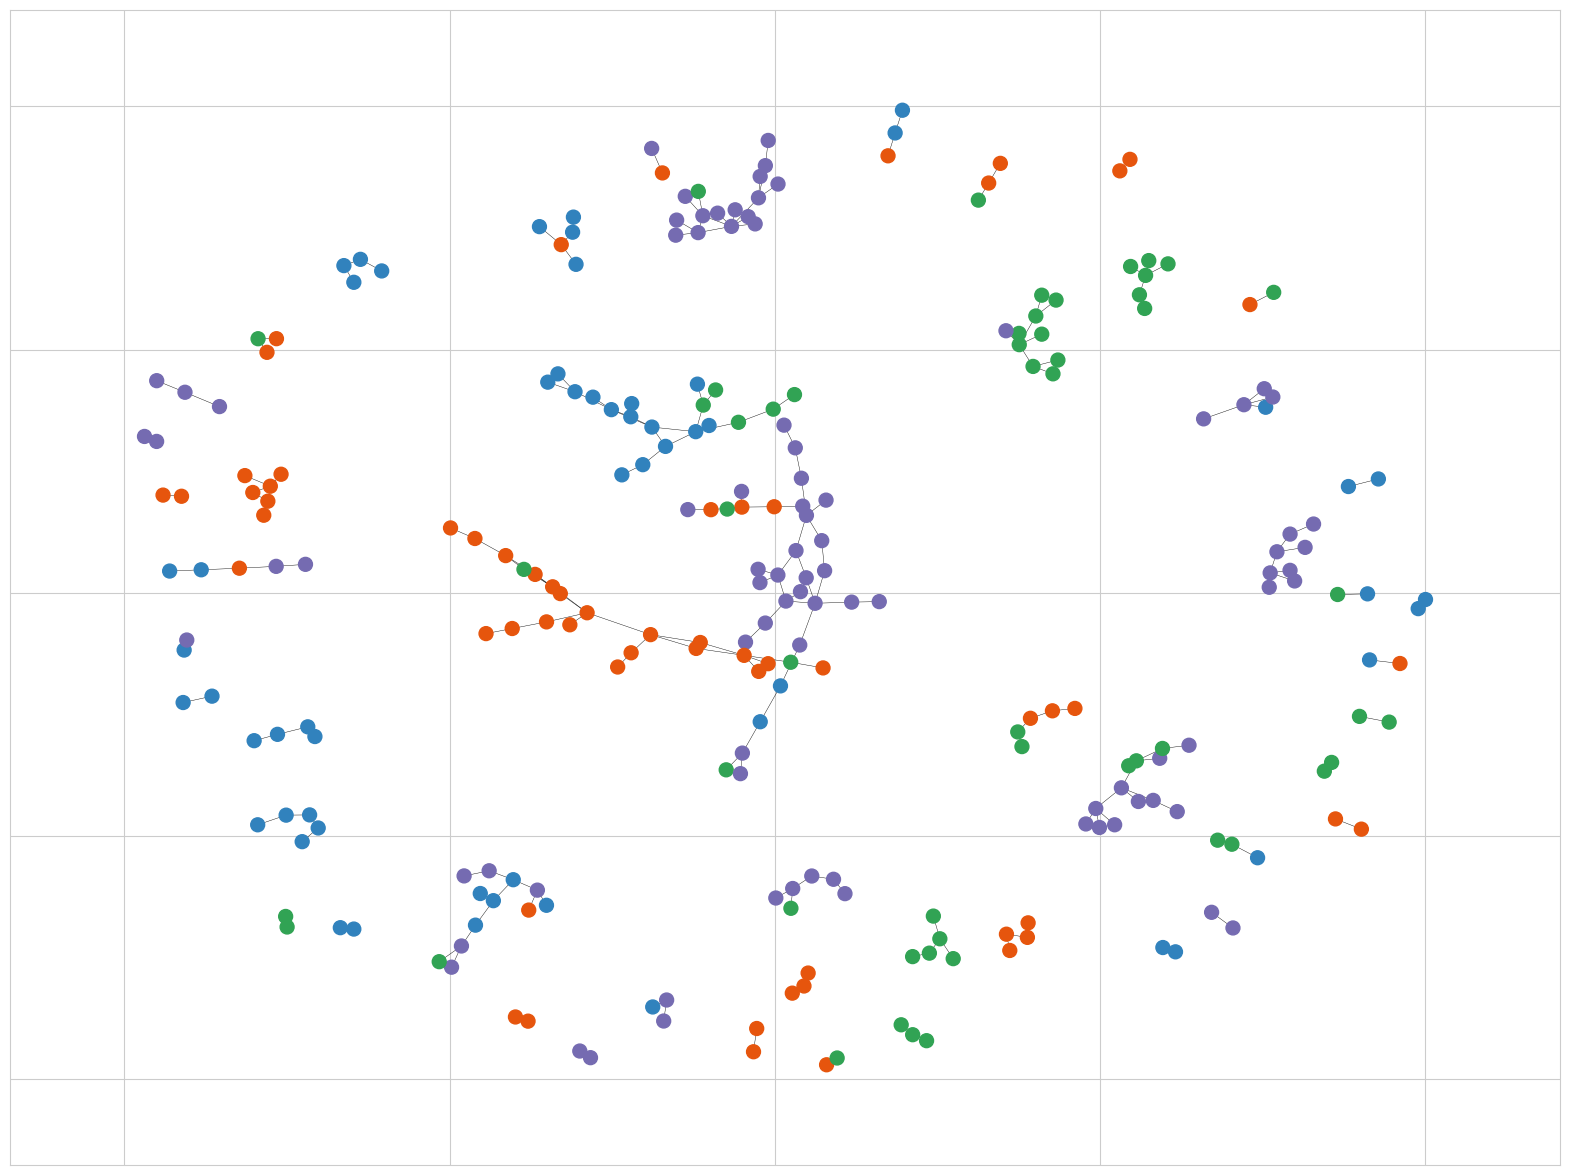

In [ ]:
import math

pretext_log = sample_easy.iloc[0].pretext_log
df = pd.DataFrame({
    'y': pretext_log['y'],
    'pseudo_label': pretext_log['GraphPartitioning_pseudo_labels'],
    'node_id': pretext_log['node_id']
})

unique_labels = df["pseudo_label"].unique()
subgraphs = []
for subgraph_id in unique_labels:
    df_sub = df[df['pseudo_label'] == subgraph_id].node_id
    G_sub = G.subgraph(df_sub).copy()
    subgraphs += [G_sub]

C = nx.Graph()
for subgraph in subgraphs:
    C = nx.union(C, subgraph)
C = nx.algorithms.k_core(C, 1)
# connected_components = sorted(nx.algorithms.connected_components(C), key=len, reverse=True)
# top_k = [m for m in connected_componetns_length if m in connected_cmponents[-len(unique_labels):]]
# for subgraph in top_k:
#     C.remove_nodes_from([n for n in C if n not in subgraph])
visualize_graph(C)


# fig, axs = plt.subplots(ncols=1, nrows=len(unique_labels), figsize=(10, 50))
# for subgraph, ax in zip(subgraphs, axs):
#     visualize_graph(subgraph, (fig, ax))

(<Figure size 2000x1500 with 1 Axes>, <AxesSubplot: >)

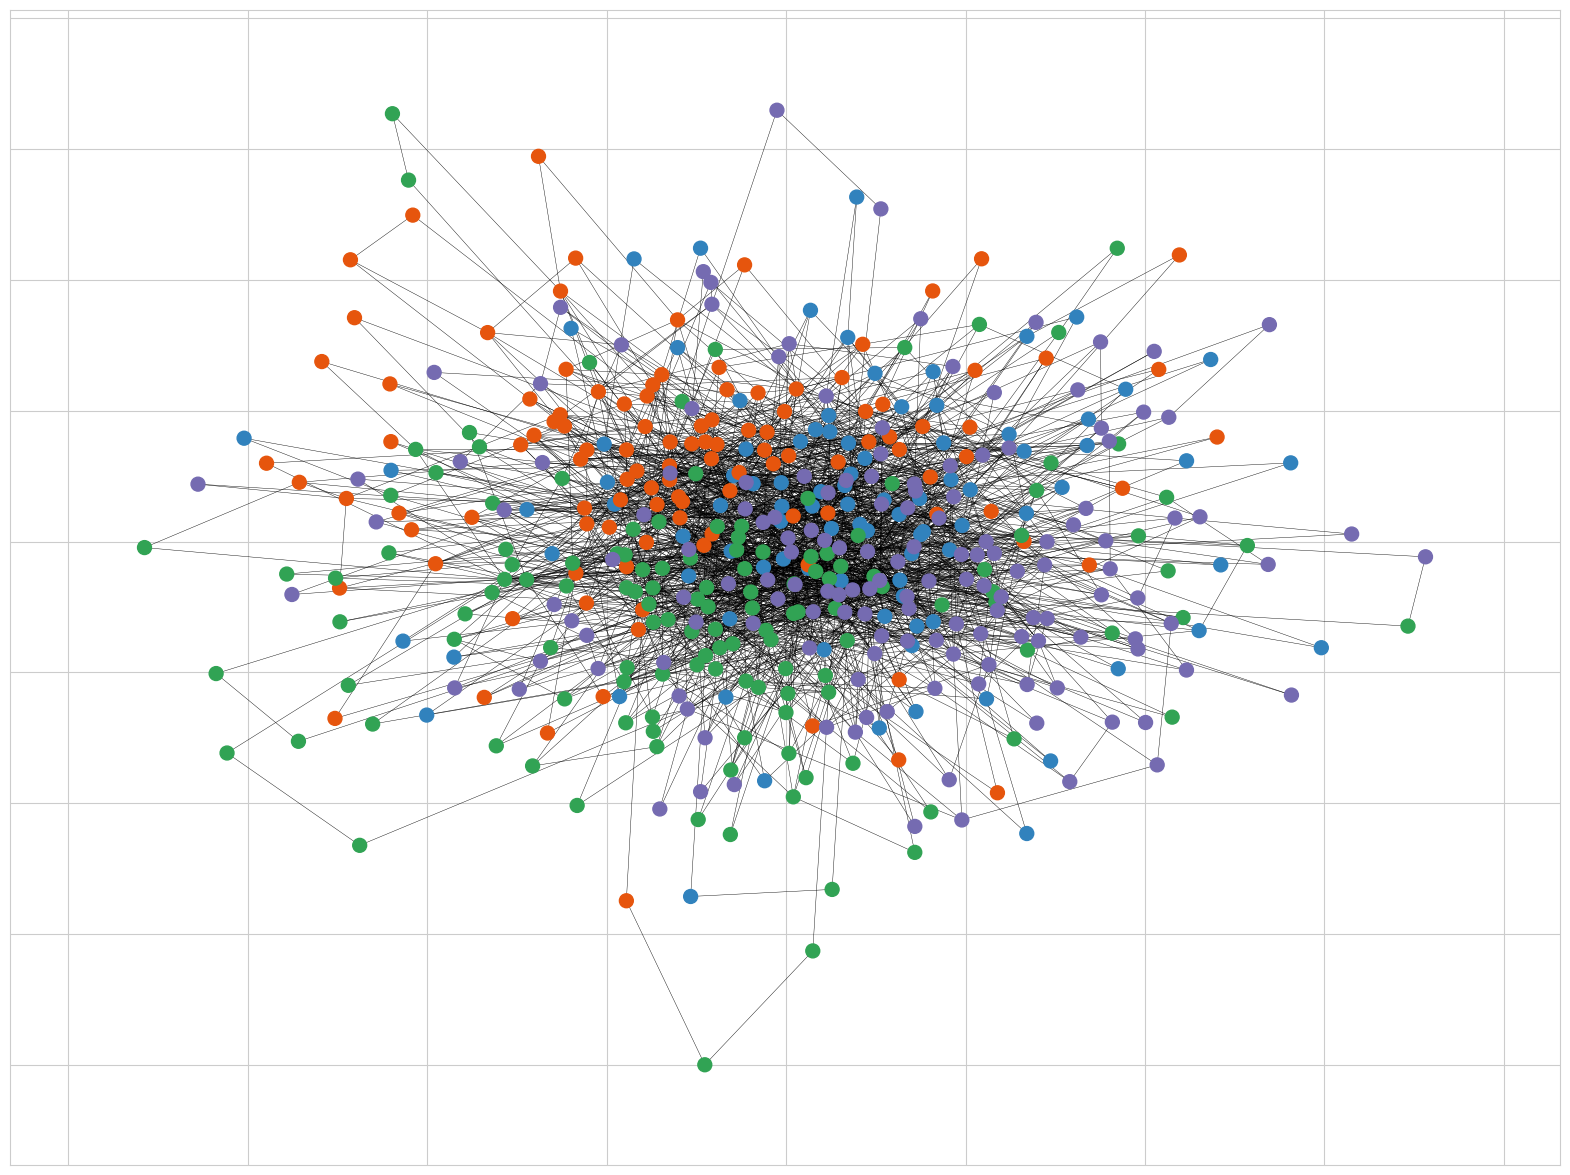

In [ ]:
pretext_logs = sample_hard['pretext_log']
G = get_graph(pretext_logs.iloc[0])
visualize_graph(G)

# Deep Graph Infomax

In [ ]:
from sklearn.manifold import TSNE

sample = data.loc[data.Experiment == 'DGI_easy'].iloc[0]
# pretext_logs = sample.loc['pretext_log']
sample